## Hill climbin algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### a) Maximize Entropy

In [2]:
support = range(-50, 51)

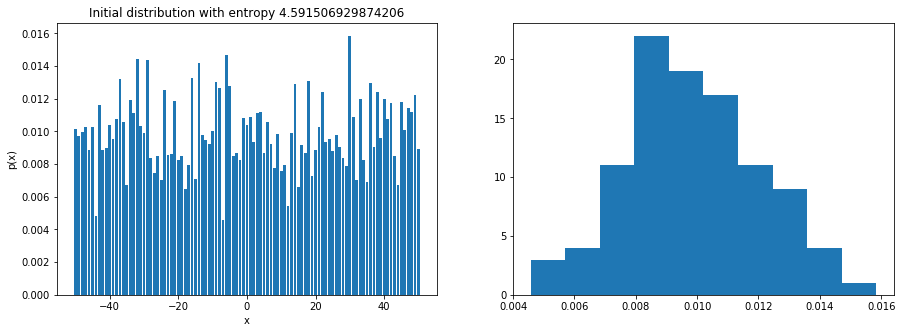

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].bar(support, p)
ax[0].set_xlabel('x')
ax[0].set_ylabel('p(x)')
ax[0].set_title('Initial distribution with entropy {0}'.format(entropy(p)))
ax[1].hist(p)
plt.show()

In [6]:
def entropy(x):
    return -np.sum([i*np.log(i) for i in x])

In [195]:
def hill_climbing(x, score, step_size, eps):
    current_x = x
    step = [step_size, -step_size]
    max_score = float('-inf')
    while True:
        initial_score = score(current_x)
        for i in range(len(x)):
            for j in range(len(step)):
                current_x[i] = current_x[i] + step[j]
                nom_x = current_x/np.sum(current_x)
                current_score = score(nom_x)
                current_x[i] = current_x[i] - step[j]
                if current_score > max_score:
                    max_score = current_score
                    best = j
            current_x[i] = current_x[i] + step[best]
            current_x = current_x/np.sum(current_x)
        if np.abs(current_score - initial_score) < eps:
            return max_score, current_x

In [196]:
p = np.random.normal(1, 0.2, len(support))
p = p/np.sum(p)

0.009900990099009903
2.7366057537931157e-07


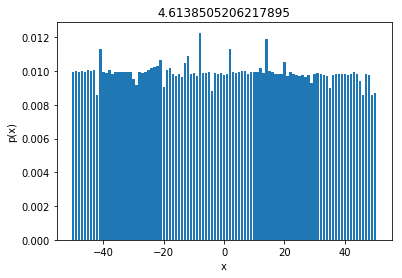

In [197]:
max_entropy, values = hill_climbing(p, entropy, 10**-4, 10**-4)
plt.bar(support, values)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(max_entropy)
print(np.mean(values))
print(np.var(values))